In [121]:
import pandas as pd

In [122]:
news = pd.read_json('Dane/News_kaggle/News_Category_Dataset_v2.json', lines=True)

In [123]:
news.tail()

,category,headline,authors,link,short_description,date
200848,TECH,RIM CEO Thorsten Heins' 'Significant' Plans Fo...,"Reuters, Reuters",https://www.huffingtonpost.com/entry/rim-ceo-t...,Verizon Wireless and AT&T are already promotin...,2012-01-28
200849,SPORTS,Maria Sharapova Stunned By Victoria Azarenka I...,,https://www.huffingtonpost.com/entry/maria-sha...,"Afterward, Azarenka, more effusive with the pr...",2012-01-28
200850,SPORTS,"Giants Over Patriots, Jets Over Colts Among M...",,https://www.huffingtonpost.com/entry/super-bow...,"Leading up to Super Bowl XLVI, the most talked...",2012-01-28
200851,SPORTS,Aldon Smith Arrested: 49ers Linebacker Busted ...,,https://www.huffingtonpost.com/entry/aldon-smi...,CORRECTION: An earlier version of this story i...,2012-01-28
200852,SPORTS,Dwight Howard Rips Teammates After Magic Loss ...,,https://www.huffingtonpost.com/entry/dwight-ho...,The five-time all-star center tore into his te...,2012-01-28


In [124]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200853 entries, 0 to 200852
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   category           200853 non-null  object        
 1   headline           200853 non-null  object        
 2   authors            200853 non-null  object        
 3   link               200853 non-null  object        
 4   short_description  200853 non-null  object        
 5   date               200853 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(5)
memory usage: 9.2+ MB


In [125]:
news.describe()

<ipython-input-125-d644a336d14c>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  news.describe()


,category,headline,authors,link,short_description,date
count,200853,200853,200853,200853,200853,200853
unique,41,199344,27993,200812,178353,2309
top,POLITICS,Sunday Roundup,,https://www.huffingtonpost.comhttp://blogs.wsj...,,2012-12-21 00:00:00
freq,32739,90,36620,2,19712,100
first,NaN,NaN,NaN,NaN,NaN,2012-01-28 00:00:00
last,NaN,NaN,NaN,NaN,NaN,2018-05-26 00:00:00


In [126]:
news.category.value_counts()

POLITICS          32739
WELLNESS          17827
ENTERTAINMENT     16058
TRAVEL             9887
STYLE & BEAUTY     9649
PARENTING          8677
HEALTHY LIVING     6694
QUEER VOICES       6314
FOOD & DRINK       6226
BUSINESS           5937
COMEDY             5175
SPORTS             4884
BLACK VOICES       4528
HOME & LIVING      4195
PARENTS            3955
THE WORLDPOST      3664
WEDDINGS           3651
WOMEN              3490
IMPACT             3459
DIVORCE            3426
CRIME              3405
MEDIA              2815
WEIRD NEWS         2670
GREEN              2622
WORLDPOST          2579
RELIGION           2556
STYLE              2254
SCIENCE            2178
WORLD NEWS         2177
TASTE              2096
TECH               2082
MONEY              1707
ARTS               1509
FIFTY              1401
GOOD NEWS          1398
ARTS & CULTURE     1339
ENVIRONMENT        1323
COLLEGE            1144
LATINO VOICES      1129
CULTURE & ARTS     1030
EDUCATION          1004
Name: category, 

# Analiza kategorii i odrzucenie niektórych z nich

Wydaje się, że odzwierciedlanie sytuacji ekonomicznej i gospodarczej kraju, czyli odzwierciedlenie indeksu SP_500 może zostać znalezione w kategoriach takich jak: <div>
* POLITICS
* BUSINESS
* THE WORLDPOST
* IMPACT
* MEDIA
* WORLDPOST
* WORLD NEWS
* MONEY
* EDUCATION
* ENVIRONMENT
   

Usuńmy więc pozostałe kolumny a zostawmy te wymienione powyżej

In [127]:
keep_categories = [
        'POLITICS', 
        'BUSINESS',
        'THE WORLDPOST',
        'IMPACT',
        'MEDIA',
        'WORLDPOST',
        'MONEY',
        'EDUCATION',
        'ENVIRONMENT'
       ]

In [128]:
news = news[news.category.isin (keep_categories)]

In [129]:
news.head()

,category,headline,authors,link,short_description,date
12,IMPACT,"With Its Way Of Life At Risk, This Remote Oyst...",Karen Pinchin,https://www.huffingtonpost.com/entry/remote-oy...,The revolution is coming to rural New Brunswick.,2018-05-26
13,POLITICS,Trump's Crackdown On Immigrant Parents Puts Mo...,Elise Foley and Roque Planas,https://www.huffingtonpost.com/entry/immigrant...,Last month a Health and Human Services officia...,2018-05-26
14,POLITICS,'Trump's Son Should Be Concerned': FBI Obtaine...,"Michael Isikoff, Yahoo News",https://www.huffingtonpost.com/entry/fbi-wiret...,The wiretaps feature conversations between Ale...,2018-05-26
15,POLITICS,Edward Snowden: There's No One Trump Loves Mor...,Mary Papenfuss,https://www.huffingtonpost.com/entry/edward-sn...,"But don't count on Robert Mueller to nail him,...",2018-05-26
16,POLITICS,Booyah: Obama Photographer Hilariously Trolls ...,Mary Papenfuss,https://www.huffingtonpost.com/entry/obama-pho...,Just a peeping minute.,2018-05-26


In [130]:
news.shape

(55227, 6)

**Rozmiar zmalał prawie 4-krotnie**

Rzućmy jeszcze okiem na to jakie newsy zawiera kategoria *IMPACT*

In [131]:
news[news.category == 'IMPACT']['headline']

12        With Its Way Of Life At Risk, This Remote Oyst...
66        Monsanto And Bayer Are Set To Merge. Here's Wh...
125       You're Going To Use That Self-Checkout Machine...
193       Machines Don't Always Steal Our Jobs. Increasi...
286       She Started A Suicide Prevention Site At Age 1...
                                ...                        
200762    Texana Hollis, 101-Year-Old Evicted Detroit Wo...
200763                    Malaria's Defeat, Africa's Future
200825                          Tinker and Change the World
200826            Pregnant and Displaced: Double the Danger
200827    Tom Brady Helps Mentor, Tom Martinez, Find A K...
Name: headline, Length: 3459, dtype: object

In [132]:
news[news.category == 'IMPACT']['headline'][12]

'With Its Way Of Life At Risk, This Remote Oyster-Growing Region Called In Robots'

In [133]:
news[news.category == 'IMPACT']['headline'][66]

"Monsanto And Bayer Are Set To Merge. Here's Why You Should Care."

Spróbujmy ją zostawić na razie. Może potem sprawdzimy jak model uczy się z nią a jak bez niej

# Grupowanie dat po liczbie wiadomości

In [134]:
dates = news.date.value_counts()

Pogrupujmy daty po tych dla których jest więcej niż 50 wiadomości 

In [135]:
dates = pd.DataFrame(data=dates)

In [136]:
dates

,date
2014-11-05,97
2016-11-09,70
2016-10-20,66
2017-01-29,61
2016-10-10,61
...,...
2013-11-25,1
2014-02-03,1
2014-01-27,1
2014-02-26,1


In [137]:
dates.rename(columns={'date': 'news_amount'}, inplace=True)

Pogrupujmy daty po tych dla których jest więcej niż *news_amount* wiadomości 

In [138]:
news_amount = 20

In [139]:
dates = dates[dates['news_amount']>=news_amount]

In [140]:
dates.reset_index(inplace=True)

In [141]:
dates.rename(columns={'index': 'Date'}, inplace=True)

C:\Users\Bartek\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [142]:
dates

,Date,news_amount
0,2014-11-05,97
1,2016-11-09,70
2,2016-10-20,66
3,2017-01-29,61
4,2016-10-10,61
...,...,...
1386,2014-09-19,20
1387,2013-05-11,20
1388,2015-04-10,20
1389,2017-06-18,20


# Dane z giełdy

In [143]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics

In [144]:
import os
DATA_PATH = "Dane/USA/SP_500.csv"

In [145]:
data_stock = pd.read_csv(DATA_PATH, sep=",")

In [146]:
data_stock.head()

,Date,Open,High,Low,Close,Volume
0,2012-01-30,1316.16,1316.16,1300.49,1313.01,2032783333
1,2012-01-31,1313.53,1321.41,1306.69,1312.41,2353083333
2,2012-02-01,1312.45,1330.52,1312.45,1324.09,2502422222
3,2012-02-02,1324.24,1329.19,1321.57,1325.54,2289400000
4,2012-02-03,1326.21,1345.34,1326.21,1344.90,2560305556


Zróbmy wykres kursu

In [147]:
import matplotlib.pyplot as plt

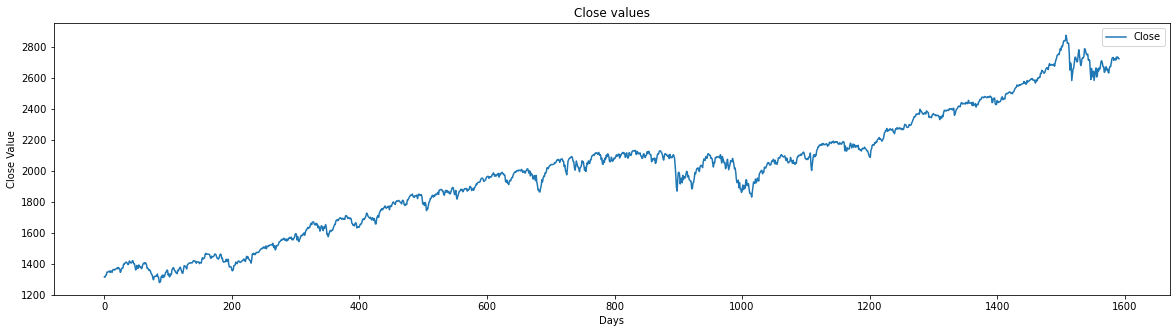

In [148]:
plt.subplots(figsize = (20, 5))
plt.plot(data_stock['Close'], label = 'Close')
# plt.ylim([0, ])
# plt.xlim([2000, 7000])
plt.ylabel('Close Value')
plt.xlabel('Days')
plt.title('Close values')
plt.legend()
plt.show()

Dodajmy do naszych danych giełdowych kolumnę wskazującą na to czy kurs wzrósł w danym dniu

In [149]:
#1 - wzrósł
#0 - zmalał
data_stock['Increased'] = data_stock['Close']-data_stock['Open']
data_stock['Increased'] = data_stock['Increased'].map(lambda diff: 1 if diff > 0 else 0)

In [150]:
data_stock.head()

,Date,Open,High,Low,Close,Volume,Increased
0,2012-01-30,1316.16,1316.16,1300.49,1313.01,2032783333,0
1,2012-01-31,1313.53,1321.41,1306.69,1312.41,2353083333,0
2,2012-02-01,1312.45,1330.52,1312.45,1324.09,2502422222,1
3,2012-02-02,1324.24,1329.19,1321.57,1325.54,2289400000,1
4,2012-02-03,1326.21,1345.34,1326.21,1344.90,2560305556,1


In [151]:
data_stock.Increased.value_counts()

1    853
0    739
Name: Increased, dtype: int64

# Usuwanie zbędnych kolumn z data_stock

Usuńmy wszystkie kolumny poza *Date* oraz *Increased* gdyż będziemy chcieli przewidzieć czy kurs wzrośnie/zmaleje na podstawie wiadomości zatem dane z giełdy są już nam niepotrzebne

In [152]:
data_stock.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)

In [153]:
data_stock.head()

,Date,Increased
0,2012-01-30,0
1,2012-01-31,0
2,2012-02-01,1
3,2012-02-02,1
4,2012-02-03,1


# Dodanie nagłówków wiadomości do danych z giełdy

Dla każdego dnia chcemy mieć 50 wiadomości

W przypadku mniejszej liczby wiadomości w danym dniu, wykasowujemy ten dzień z danych

Patrzymy więc, które dane wykasować, do tego celu używamy iloczynu zbiorów

In [154]:
dates.Date

0      2014-11-05
1      2016-11-09
2      2016-10-20
3      2017-01-29
4      2016-10-10
          ...    
1386   2014-09-19
1387   2013-05-11
1388   2015-04-10
1389   2017-06-18
1390   2014-06-20
Name: Date, Length: 1391, dtype: datetime64[ns]

In [155]:
idx1 = pd.Index(data_stock.Date.astype(str))

In [156]:
idx2 = pd.Index(dates.Date.astype(str))

In [157]:
dates_valid = idx1.intersection(idx2)

In [158]:
idx2

Index(['2014-11-05', '2016-11-09', '2016-10-20', '2017-01-29', '2016-10-10',
       '2017-08-16', '2016-10-05', '2015-11-14', '2016-09-27', '2017-02-08',
       ...
       '2017-08-27', '2014-12-01', '2017-09-04', '2013-02-09', '2014-01-12',
       '2014-09-19', '2013-05-11', '2015-04-10', '2017-06-18', '2014-06-20'],
      dtype='object', name='Date', length=1391)

In [159]:
idx1

Index(['2012-01-30', '2012-01-31', '2012-02-01', '2012-02-02', '2012-02-03',
       '2012-02-06', '2012-02-07', '2012-02-08', '2012-02-09', '2012-02-10',
       ...
       '2018-05-14', '2018-05-15', '2018-05-16', '2018-05-17', '2018-05-18',
       '2018-05-21', '2018-05-22', '2018-05-23', '2018-05-24', '2018-05-25'],
      dtype='object', name='Date', length=1592)

In [160]:
dates_valid = pd.DataFrame(data=dates_valid)

In [161]:
dates_valid

,Date
0,2012-03-01
1,2012-11-23
2,2012-12-24
3,2013-07-05
4,2013-11-29
...,...
977,2018-05-17
978,2018-05-18
979,2018-05-22
980,2018-05-23


Dla wartości dates_valid będziemy dobierać wiadomości 

Dlatego usuńmy wiersze te wiersze w data_stock, które nie występują w dates_valid

In [162]:
data_stock['Date'] = data_stock['Date'].astype(str)

In [163]:
data_stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1592 entries, 0 to 1591
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       1592 non-null   object
 1   Increased  1592 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 25.0+ KB


In [164]:
dates_valid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 982 entries, 0 to 981
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    982 non-null    object
dtypes: object(1)
memory usage: 7.8+ KB


In [165]:
data_stock = data_stock[data_stock['Date'].isin(dates_valid['Date'].values)]

In [166]:
data_stock

,Date,Increased
22,2012-03-01,1
206,2012-11-23,1
227,2012-12-24,0
359,2013-07-05,1
462,2013-11-29,0
...,...,...
1585,2018-05-17,1
1586,2018-05-18,0
1588,2018-05-22,0
1589,2018-05-23,1


Zachowaliśmy wiersze, dla których mamy *news_amount* wiadomości

Dodajmy te wiadomości do naszego data_stock

Każdy nr wiadomości to oddzielna kolumna

Dlatego musimy dodać *news_amount* kolumn

In [167]:
for i in range (1, news_amount+1):
    data_stock['News_no'+str(i)] = 'NaN'

In [168]:
data_stock

,Date,Increased,News_no1,News_no2,News_no3,News_no4,News_no5,News_no6,News_no7,News_no8,...,News_no11,News_no12,News_no13,News_no14,News_no15,News_no16,News_no17,News_no18,News_no19,News_no20
22,2012-03-01,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
206,2012-11-23,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
227,2012-12-24,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
359,2013-07-05,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
462,2013-11-29,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1585,2018-05-17,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1586,2018-05-18,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1588,2018-05-22,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1589,2018-05-23,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Przykład dodania ręcznie jednego news'a**

In [169]:
np.array(news[news.date == '2018-05-25']['headline'])[0]

'Jack Johnson Was Pardoned, But Taboo Sex Is Still Being Criminalized'

In [170]:
# data_stock[data_stock.Date == '2018-05-25']['News_no1'] = "j"   bad
data_stock.loc[data_stock.Date == '2018-05-25','News_no1'] = 'j'

In [171]:
data_stock.loc[data_stock.Date == '2018-05-25','News_no1'] = np.array(news[news.date == '2018-05-25']['headline'])[0]

In [172]:
data_stock.News_no1.value_counts()

NaN    982
Name: News_no1, dtype: int64

In [173]:
data_stock.tail()

,Date,Increased,News_no1,News_no2,News_no3,News_no4,News_no5,News_no6,News_no7,News_no8,...,News_no11,News_no12,News_no13,News_no14,News_no15,News_no16,News_no17,News_no18,News_no19,News_no20
1585,2018-05-17,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1586,2018-05-18,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1588,2018-05-22,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1589,2018-05-23,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1590,2018-05-24,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [174]:
news.head()

,category,headline,authors,link,short_description,date
12,IMPACT,"With Its Way Of Life At Risk, This Remote Oyst...",Karen Pinchin,https://www.huffingtonpost.com/entry/remote-oy...,The revolution is coming to rural New Brunswick.,2018-05-26
13,POLITICS,Trump's Crackdown On Immigrant Parents Puts Mo...,Elise Foley and Roque Planas,https://www.huffingtonpost.com/entry/immigrant...,Last month a Health and Human Services officia...,2018-05-26
14,POLITICS,'Trump's Son Should Be Concerned': FBI Obtaine...,"Michael Isikoff, Yahoo News",https://www.huffingtonpost.com/entry/fbi-wiret...,The wiretaps feature conversations between Ale...,2018-05-26
15,POLITICS,Edward Snowden: There's No One Trump Loves Mor...,Mary Papenfuss,https://www.huffingtonpost.com/entry/edward-sn...,"But don't count on Robert Mueller to nail him,...",2018-05-26
16,POLITICS,Booyah: Obama Photographer Hilariously Trolls ...,Mary Papenfuss,https://www.huffingtonpost.com/entry/obama-pho...,Just a peeping minute.,2018-05-26


In [175]:
#---------

**Automatyczne iterowanie po wierszach data_stock i dodawanie kolejnych newsów**

In [176]:
for i in range(1, news_amount+1):
    for index, row in data_stock.iterrows():
        date_row = row['Date']
        data_stock.loc[data_stock.Date == date_row,'News_no'+str(i)] = np.array(news[news.date == date_row]['headline'])[i-1]

In [177]:
data_stock.tail()

,Date,Increased,News_no1,News_no2,News_no3,News_no4,News_no5,News_no6,News_no7,News_no8,...,News_no11,News_no12,News_no13,News_no14,News_no15,News_no16,News_no17,News_no18,News_no19,News_no20
1585,2018-05-17,1,Business Groups Might Be Quietly Killing A Bil...,Kushner Family Reportedly Close To Getting Bai...,Trump Says He'll Give To Charity For Royal Wed...,Federal Prosecutors Still Trying To Turn Trump...,Republican Immigration Fight Derails Food Stam...,Retiring Lawmakers Have Added $32.8 Million To...,"Facing Farm Bill Vote Problems, GOP Leaders Ma...",Trump’s Stormy Daniels Disclosure Still Leaves...,...,Boulder City Council Unanimously Votes To Ban ...,Mitch McConnell Taps Anti-LGBTQ Bigot For Reli...,"Devin Nunes, Fundraising Off FBI Attacks, Tell...",Former Mexican President Warns Donald Trump: '...,Fox News' First Female CEO Was Named In Sexual...,The Battle To Save Our Dying Soil,Scam PACs Ripped Off Conservatives With Pro-Po...,Trump's ICE Is Increasingly Arresting Immigran...,Special Counsel Hits Roger Stone's Social Medi...,"Josh Holt, American Captive in Venezuela, Begs..."
1586,2018-05-18,0,Santa Fe High Schoolers Held Gun Violence Prot...,Jeff Sessions Uses Exceptional Power Over Immi...,GOP Rep. Introduces Bill That Would Demand Whi...,Meek Mill Backs Out Of Trump Event On Prison R...,New Trump Rule Would Cut Federal Funds From Cl...,Twitter Users Joke Trump Wants Prison Reform B...,Trump White House Kills Off Yanny-Laurel Debat...,Lawyer Who Ranted Against Spanish-Speakers Fac...,...,Gun Owners And Non-Gun Owners Actually Agree O...,Twitter Users Pan Ted Cruz After He Tweets 'Pr...,So States Ban Bump Stocks. Now How Do They Enf...,"For Liberal Billionaire Tom Steyer, It’s All A...",Sen. Dean Heller’s Campaign Paid His Social Me...,Interior Dept. Dodges Watchdog’s Questions Abo...,Bill Gates Says Trump Didn't Know The Differen...,Robert Wilkie Picked As New VA Secretary In Su...,Trump's New 'Domestic Gag Rule' Would Strip Fu...,"Rudy Giuliani Reverses Trump Team's Position, ..."
1588,2018-05-22,0,Shoppers Boycott Publix Over Store's Donations...,Bill De Blasio Tells NYPD To Stop Arresting Pe...,"DHS Head Says She’s Still, Somehow, Unaware Of...",Lawmaker Introduces Crowdfunding Bill To Pay F...,GOP Lawmakers Will Soon Be Allowed To Review C...,The Georgia GOP Governor's Primary Focuses On ...,Georgia Governor’s Primary Highlights Competin...,"California Moves To Let Schools, Co-workers 'R...",...,Giuliani’s New Stance On Russian Collusion: So...,The Onion Hilariously Trolls Michael Cohen Wit...,Democrats Want To Boost School Funding To Addr...,But Her Emails? Lawmakers Shrug Off Trump’s La...,Congress Does Wall Street A Favor As Banks Pos...,White House Sinkhole Probably Metaphor For Som...,"Reporter Shoved, Others Barred From EPA Meetin...",Garry Kasparov: Donald Trump Has More Russian ...,'60 Minutes' Reporter Reveals Trump's Chilling...,Trump Reportedly Rejects Phone Security Measur...
1589,2018-05-23,1,Betsy DeVos Stirs Uproar By Saying Schools Can...,"6 Sandy Hook Families, FBI Agent Sue Alex Jone...",High School Teacher Defeats Kentucky House Maj...,Lupe Valdez Makes History In Texas By Winning ...,Report: Michael Cohen's Business Partner Coope...,Stacey Abrams Wins Democratic Primary For Geor...,Gina Ortiz Jones Wins Democratic Runoff In Tex...,Fighter Pilot Amy McGrath Wins Democratic Prim...,...,The Latest School Shooting Hasn't Really Stirr...,House Republicans Report Progress On An Immigr...,Democrats Weren't Invited To Review Classified...,GOP Candidate Who Pointed Gun At Teenager Adva...,Democrats Push To Be Included In Classified Br...,Machines Don't Always Steal Our Jobs. Increasi...,Trump Praises Tomi Lahren After Restaurant Cro...,Sarah Sanders: It 'Bothers Me' Being Called A ...,Trump Blocking People On Twitter Is Unconstitu...,A Mostly Non-Christian Militia Won 2 Of Iraqi ...
1590,2018-05-24,0,Michelle Obama Reveals Cover For Upcoming Memo...,"U.S. Launches Auto Import Probe, China Vows To...

*Sprawdzenie*

In [180]:
np.array(news[news.date == '2018-05-24']['headline'])[19]

"Read Trump's Letter To Kim Jong Un Canceling North Korea Summit"

# Tworzenie pliku csv

In [181]:
out = pd.DataFrame(data=data_stock)

In [182]:
out.to_csv("stock_data_with_news.csv", index=False)